# 基础准备

In [1]:
#准备工作
#导入所需的包和配置环境
# 导入工具包
import re, jieba#用于中文分词
from collections import Counter

import matplotlib.pyplot as plt
import random
import numpy as np 
import seaborn as sns
import pandas as pd
import pyecharts.options as opts
import pyecharts

from wordcloud import WordCloud #用于生成词云图
from PIL import Image #用于处理图像数据

from IPython.display import Math,display,Latex
import math
from numpy import sin


plt.rcParams["font.sans-serif"]=["SimHei"]#中文格式
plt.rcParams['axes.unicode_minus'] =False #这个代码可以解决matploit负号显示问题
%matplotlib inline
# 配置字体参数（seaborn需要修改rc参数实现中文输入）
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)


# 常规数据整理

In [35]:
# 读取CSV文件
df = pd.read_csv('outputpro.csv')

# 显示数据的前几行，确保数据导入成功
print(df.head())

   发送人        消息内容                       特殊内容  消息时间年  消息时间月  消息时间日       消息日期  \
0  张钰瑶  拉你的小孩@绍煜                          NaN   2023      4     24  2023/4/24   
1   系统              "工商张钰瑶"邀请你和"星星春困"加入了群聊:     2023      4     24  2023/4/24   
2  张钰瑶  拉柳佳@星星春困                          NaN   2023      4     24  2023/4/24   
3   系统                 "工商张钰瑶"修改群名为“半决赛正方”:     2023      4     24  2023/4/24   
4   系统                  你邀请"徐铭、张润涵"加入了群聊  :     2023      4     24  2023/4/24   

   消息时间时  消息时间分   消息时间  Unnamed: 10  Unnamed: 11  
0     11     12  11:12          NaN          NaN  
1     11     12  11:12          NaN          NaN  
2     11     12  11:12          NaN          NaN  
3     11     13  11:13          NaN          NaN  
4     11     13  11:13          NaN          NaN  


In [3]:
# 按照发送人和月份进行分组统计发言频率
monthly_freq = df.groupby(['发送人', '消息时间月']).size().reset_index(name='发言频率')

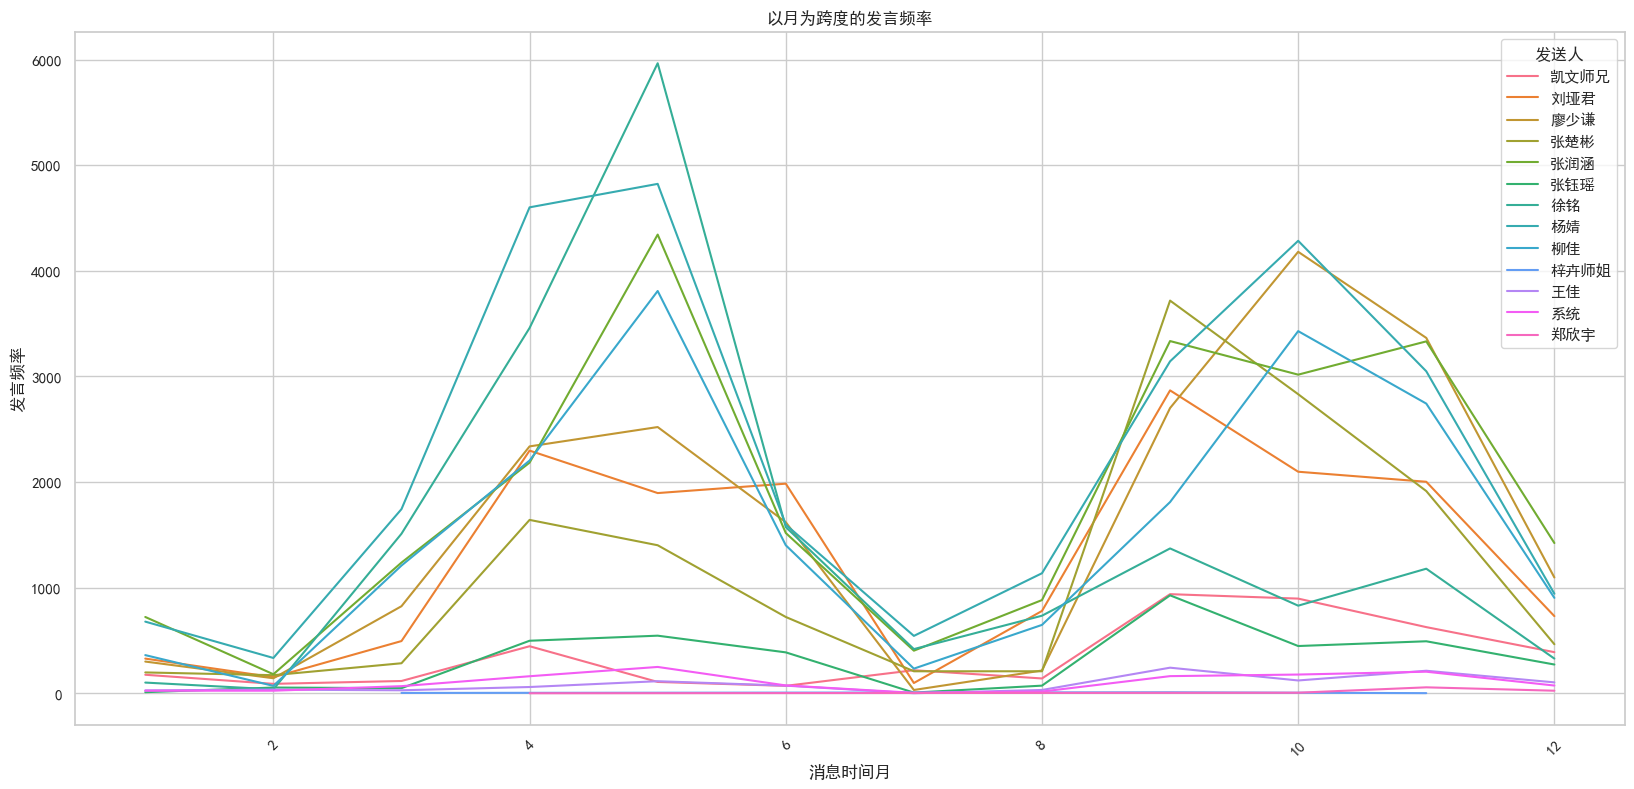

In [4]:
# 设置图形风格

sns.set(style="whitegrid")
# 绘制以月为跨度的发言频率图
plt.rcParams["font.sans-serif"]=["SimHei"]#中文格式
plt.rcParams['axes.unicode_minus'] =False #这个代码可以解决matploit负号显示问题
plt.figure(figsize=(20, 9))
sns.lineplot(x='消息时间月', y='发言频率', hue='发送人', data=monthly_freq)
plt.title('以月为跨度的发言频率')
plt.xlabel('消息时间月')
plt.ylabel('发言频率')
plt.xticks(rotation=45)
plt.show()


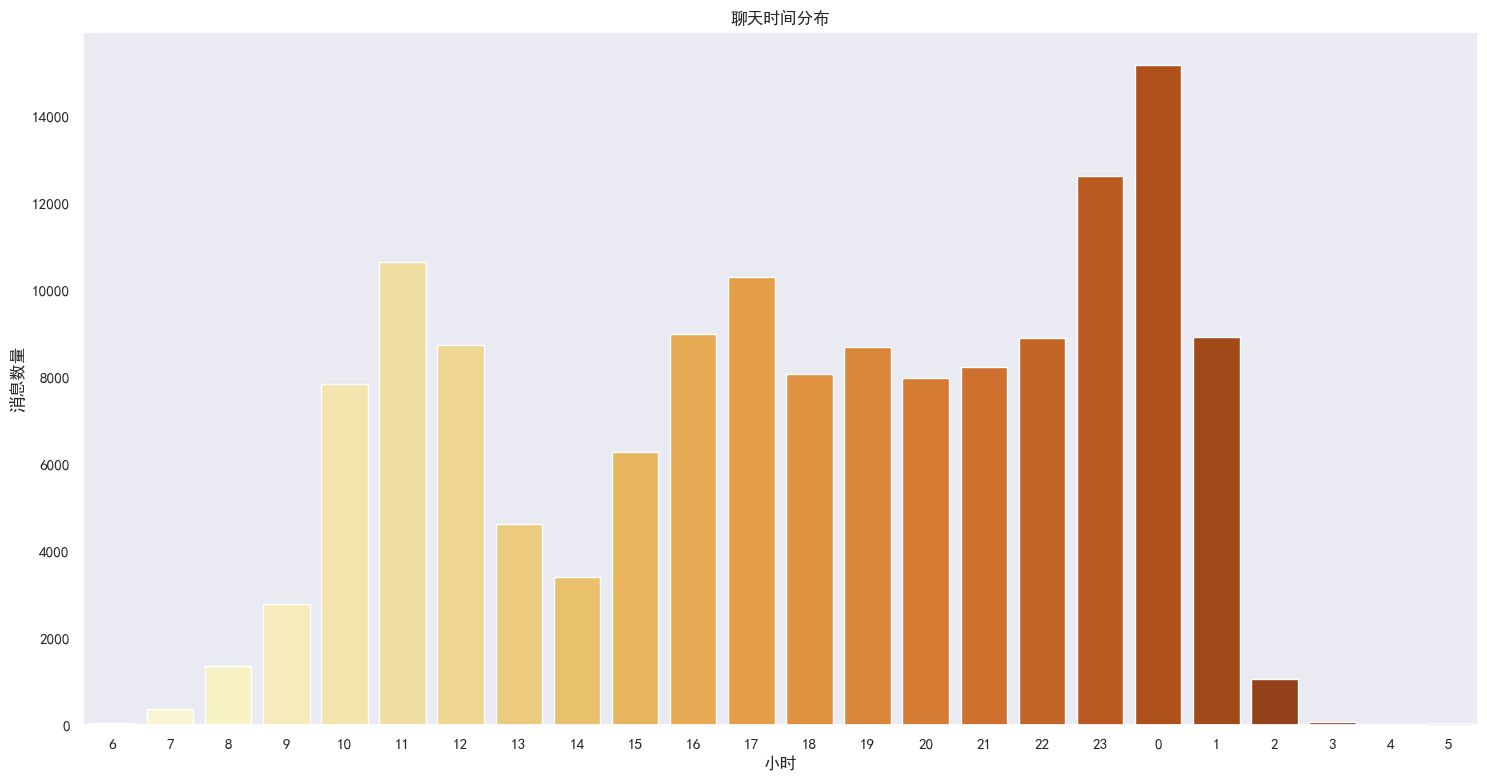

In [5]:
# 按小时统计消息数量
hourly_distribution = df.groupby('消息时间时').size().reset_index(name='消息数量')
sns.set(style="dark")
plt.rcParams["font.sans-serif"]=["SimHei"]#中文格式
plt.rcParams['axes.unicode_minus'] =False #这个代码可以解决matploit负号显示问题
# 将 x 轴刻度设定为指定的小时范围（7点到24点，再到0点，再到6点）
custom_hours = [6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5]
hourly_distribution['消息时间时'] = pd.Categorical(hourly_distribution['消息时间时'], categories=custom_hours, ordered=True)

# 绘制聊天时间分布的柱状图
plt.figure(figsize=(18, 9))
sns.barplot(x='消息时间时', y='消息数量', data=hourly_distribution, palette='YlOrBr')
plt.title('聊天时间分布')
plt.xlabel('小时')
plt.ylabel('消息数量')
plt.show()
# 按小时统计消息数量
hourly_distribution = df.groupby('消息时间时').size().reset_index(name='消息数量')
plt.show()

In [6]:
# 导出到Excel文件
monthly_freq.to_excel('monthly_frequency.xlsx', index=False)

# 词频统计

In [7]:
#被动词频统计：输出的是字面意义的最多次词汇

# 提取消息内容
x_messages = df['消息内容']
#x_messages = df[df['发送人'] == '廖少谦']['消息内容']
#x_messages = df[df['发送人'].isin(['张润涵', '廖少谦'])]['消息内容']

# 合并所有消息内容为一个字符串
x_text = ' '.join(x_messages)

# 使用jieba进行分词
#seg_list = jieba.cut(x_text, cut_all=False)
seg_list = jieba.cut(x_text)


# 统计词频
word_counts = Counter(seg_list)

# 输出高频词
top_words = word_counts.most_common(1000)
for word, count in top_words:
    print(f'{word}: {count}')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17100\AppData\Local\Temp\jieba.cache
Loading model cost 0.401 seconds.
Prefix dict has been built successfully.


 : 442574
[: 24529
]: 24529
我: 23192
的: 22480
了: 19003
是: 10898
表情: 10442
包: 10419
你: 7360
不: 5474
都: 4712
也: 4697
就: 4251
。: 4152
图片: 4121
吗: 4104
说: 4026
，: 4008
在: 3778
啊: 3558
吧: 3407
我们: 3309
有: 3238
好: 3133
？: 3129
什么: 2901
这个: 2890
去: 2642
还: 2618
不是: 2618
没: 2582
死: 2508
他: 2468
和: 2467
笑: 2450
这: 2252
人: 2153
很: 2146
要: 2134
就是: 2077
那: 1978
一个: 1977
给: 1970
怎么: 1936
看: 1832
想: 1809
你们: 1776
觉得: 1724
可以: 1634
感觉: 1567
呢: 1554
能: 1450
对: 1444
没有: 1429
谁: 1375
！: 1355
那个: 1339
知道: 1298
语音: 1291
他们: 1286
来: 1282
捂脸: 1275
还是: 1268
真的: 1256
现在: 1255
上: 1241
打: 1226
会: 1209
调皮: 1119
自己: 1116
被: 1113
吃: 1089
可能: 1077
把: 1069
…: 1037
但是: 1035
到: 1024
她: 1017
哈哈哈: 994
啥: 984
个: 980
又: 979
这么: 964
不能: 945
多: 939
微笑: 929
但: 903
让: 885
=: 870
确实: 867
小: 855
一下: 832
这样: 829
:: 812
不会: 811
应该: 803
做: 803
还有: 801
/: 790
得: 781
为什么: 770
喜欢: 757
已经: 746
么: 736
时候: 715
因为: 707
过: 706
辩论: 691
.: 689
然后: 689
着: 675
&: 660
今天: 641
其实: 637
问题: 626
跟: 622
;: 620
有点: 615
所以: 614
amp: 614
听: 613
找: 60

增加自定义词汇列

In [8]:
# 自定义词汇列表
custom_words = ['6+', '表情包','笑死','廖总','廖妈','zjc','lyy','zjh','哭死','气死','乐死','吓死','想死']

# 添加自定义词汇
for word in custom_words:
    jieba.add_word(word)

# 提取消息内容
x_messages = df['消息内容']

# 合并所有消息内容为一个字符串
x_text = ' '.join(x_messages)

# 使用jieba进行分词
seg_list = jieba.cut(x_text)

# 统计词频
word_counts = Counter(seg_list)

# 输出高频词
top_words = word_counts.most_common(2000)
for word, count in top_words:
    print(f'{word}: {count}')


 : 442574
[: 24529
]: 24529
我: 23189
的: 22480
了: 19006
是: 10900
表情包: 10403
你: 7360
不: 5474
都: 4715
也: 4697
就: 4251
。: 4152
图片: 4121
吗: 4104
说: 4031
，: 4008
在: 3780
啊: 3558
吧: 3407
我们: 3309
有: 3239
好: 3133
？: 3129
什么: 2901
这个: 2890
去: 2646
不是: 2618
还: 2616
没: 2583
和: 2476
他: 2468
这: 2251
人: 2153
很: 2146
要: 2135
就是: 2077
那: 1978
一个: 1977
给: 1975
怎么: 1936
笑死: 1872
看: 1832
你们: 1776
觉得: 1724
可以: 1634
想: 1601
感觉: 1567
呢: 1554
能: 1450
对: 1445
没有: 1429
谁: 1375
！: 1355
那个: 1339
知道: 1298
来: 1291
语音: 1291
他们: 1286
捂脸: 1275
还是: 1268
真的: 1256
现在: 1255
上: 1241
打: 1227
会: 1208
调皮: 1119
自己: 1116
被: 1113
吃: 1089
可能: 1077
把: 1069
…: 1037
但是: 1035
到: 1024
她: 1017
哈哈哈: 994
啥: 984
又: 979
个: 979
这么: 964
不能: 945
多: 938
微笑: 929
但: 903
让: 886
=: 870
确实: 867
小: 855
一下: 832
这样: 829
:: 812
不会: 811
做: 804
应该: 803
还有: 801
/: 790
得: 783
为什么: 770
喜欢: 757
已经: 746
么: 736
时候: 715
因为: 707
过: 706
辩论: 691
.: 689
然后: 689
着: 675
&: 660
今天: 641
其实: 637
问题: 626
跟: 622
;: 620
有点: 615
所以: 614
amp: 614
听: 613
找: 602
太: 593
笑: 588

In [9]:
#忽略停用词版r

# 提取消息内容
x_messages = df['消息内容']
#x_messages = df[df['发送人'] == '绍煜']['消息内容']


# 合并所有消息内容为一个字符串
x_text = ' '.join(x_messages)

# 读取停用词文件
with open('stop.txt', 'r', encoding='utf-8') as stop_file:
    stop_words = set(stop_file.read().splitlines())

# 使用jieba进行分词并过滤停用词
seg_list = jieba.cut(x_text)
filtered_seg_list = [word for word in seg_list if word not in stop_words]

# 统计词频
word_counts = Counter(filtered_seg_list)

# 输出高频词
top_words = word_counts.most_common(1000)
for word, count in top_words:
    print(f'{word}: {count}')


 : 442574
表情包: 10403
图片: 4121
说: 4031
没: 2583
一个: 1977
笑死: 1872
想: 1601
感觉: 1567
语音: 1291
捂脸: 1275
真的: 1256
调皮: 1119
吃: 1089
…: 1037
哈哈哈: 994
微笑: 929
=: 870
确实: 867
做: 804
/: 790
喜欢: 757
辩论: 691
&: 660
;: 620
amp: 614
听: 613
找: 602
太: 593
笑: 588
问: 587
好像: 585
东西: 585
1: 569
写: 567
哈哈哈哈: 527
玩: 504
老师: 489
挺: 487
完: 481
真: 476
睡: 466
xm: 458
工商: 455
君姐: 449
师姐: 443
一点: 442
我要: 440
点: 426
6: 419
...: 406
懂: 404
dimi: 402
两个: 399
这是: 397
更: 397
明天: 391
买: 391
死: 383
不好: 382
没事: 379
师兄: 376
朋友: 368
学校: 367
Facepalm: 361
噢: 360
对面: 358
男: 355
不想: 352
搞: 351
雪贝: 345
爱: 343
啊啊啊: 342
时间: 336
可怜: 333
比赛: 330
反正: 329
肯定: 325
（: 324
只能: 322
走: 321
里: 321
好好: 319
有人: 316
 : 315
工作: 315
发: 315
晚上: 314
小孩: 309
带: 308
几个: 305
-: 304
?: 303
乐: 302
发现: 294
有没有: 292
校队: 292
妈: 290
奥子哥: 289
群友: 288
逼: 286
）: 285
讨论: 282
长衫: 281
数据: 281
不行: 274
不到: 273
流泪: 272
快: 272
_: 272
统数: 268
话: 268
杀: 266
视频: 266
lj: 266
课: 264
帮: 264
评委: 264
好看: 261
讲: 260
刚刚: 260
一种: 258
廖总: 255
选: 255
行: 254
不用: 252
事情: 249
记得:

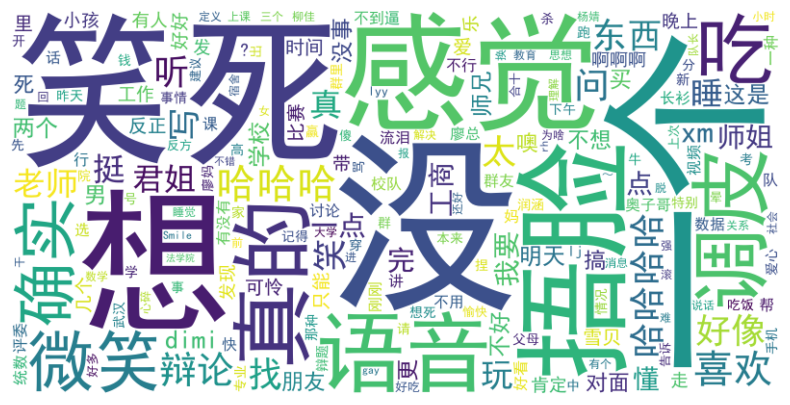

In [10]:
#词云图，但目前是手动处理的，复制忽略过停用词的频数，把频数取log2后除10，得到词频放在cy.xlsx里了
# 读取 Excel 文件
df = pd.read_excel('cy.xlsx')

# 创建一个字典，用于生成词云
word_freq_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))# 指定中文字体文件路径
font_path = 'simhei.ttf'

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_dict)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#  ↓优化词云图写好了嗷

In [33]:
# 所有词语词频统计结果
data1 = pd.read_excel('cp.xlsx')#词频比词库要多一个标题行
df = data1.head(500)      # 取前五十行，代表前 50 个词语
Words = [(w, f) for w,f in zip(df['词语'], df['词频'])]
# [('发展', 411),('建设', 349),('完善', 276),('体系', 252),……]

import pyecharts.options as opts
from pyecharts.charts import WordCloud
#用来解决没有add函数的一个神奇方法


wordcloud=WordCloud()
# 词云图轮廓(shape)，可选参数有’circle’, ‘cardioid’, ‘diamond’, ‘triangleforward’, ‘triangle’, ‘pentagon’, ‘star’ 
wordcloud.add("", Words, shape='circle')

from PIL import Image   #图片处理
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Words_dict = df.set_index('词语').to_dict()['词频']

img = Image.open('GB.jpg') # 加载背景图片
img_array = np.array(img)    # 将图片变为数组，便于用作词云图形状

wordcloud = WordCloud(
    mask = img_array,     # 设置背景图，上面已经加载
    font_path="C:/Windows/Fonts/SimHei.ttf", #设置字体和大小,这里使用黑体
    max_font_size = 220,   # 词云图中词语字号最大值
    min_font_size = 5,    # 词云图中词语字号最小值
    max_words=1400,        # 设置词语数量
    repeat=True,         # 当 max_words 超过总词数，是否使用重复的词语代替
    background_color="white", # 设置背景颜色为白色
    width=1200,            # 设置宽高
    height=600
    ).generate_from_frequencies(Words_dict)

# 将词云图保存到本地
wordcloud.to_file('gaybar词云图.png')

#这个参数感觉还可以：
#整体思路大概是： 背景图：先用word写出gaybar，然后转pdf转GB.jpg 语料库：gaybar的时间积淀 词频统计：可以在全自动摸鱼机里翻到 然后调参即可

In [38]:
#主动词频统计：定向搜索某词的出现频率
#手动版本
# 提取消息内容
x_messages = df['消息内容']

# 初始化一个字典来存储每个发送人的词汇计数
word_counts_by_sender = {}

# 遍历DataFrame中的每一行
for index, row in df.iterrows():
    sender = row['发送人']
    message = row['消息内容']
    
    # 使用jieba进行分词
    seg_list = jieba.cut(message)
    
    # 如果当前发送人已经在字典中，更新计数；否则，创建新的计数器
    if sender in word_counts_by_sender:
        word_counts_by_sender[sender].update(Counter(seg_list))
    else:
        word_counts_by_sender[sender] = Counter(seg_list)

# 输入你想要统计的特定词汇
target_word = '图片'

# 输出每个发送人中特定词汇的出现次数
for sender, word_count in word_counts_by_sender.items():
    count = word_count.get(target_word, 0)
    print(f' {sender} 说 "{target_word}" 了 {count} 次')

 张钰瑶 说 "图片" 了 77 次
 系统 说 "图片" 了 0 次
 廖少谦 说 "图片" 了 790 次
 杨婧 说 "图片" 了 854 次
 徐铭 说 "图片" 了 464 次
 张润涵 说 "图片" 了 969 次
 王佳 说 "图片" 了 28 次
 柳佳 说 "图片" 了 370 次
 刘垭君 说 "图片" 了 291 次
 张楚彬 说 "图片" 了 210 次
 凯文师兄 说 "图片" 了 63 次
 郑欣宇 说 "图片" 了 5 次
 梓卉师姐 说 "图片" 了 0 次


# 自动主动关键词检索
#修改target。xlsx即可完成对于所需关键词的统计和收集，这样一来就大大缩减了所需的工作量

In [23]:
# 读取2.14bar.xlsx和target.xlsx文件
bar_df = df
target_df = pd.read_excel('target.xlsx')

# 创建一个空的数据框，用于存储统计结果，指定唯一的索引列
result_df = pd.DataFrame(index=bar_df['发送人'].unique(), columns=['发送人'] + list(target_df['关键词']))

# 对消息内容进行分词
bar_df['分词内容'] = bar_df['消息内容'].apply(lambda x: ' '.join(jieba.lcut(str(x))))

# 遍历每个发送人
for sender in bar_df['发送人'].unique():
    sender_data = {'发送人': sender}
    
    # 遍历关键词
    for keyword in target_df['关键词']:
        # 将关键词转换为字符串，然后统计关键词在分词内容中出现的次数
        count = bar_df[bar_df['发送人'] == sender]['分词内容'].str.count(str(keyword)).sum()
        sender_data[keyword] = count
    
    # 将每个发送人的统计结果添加到结果数据框中
    result_df.loc[sender] = sender_data

# 将结果保存为新的xlsx文件
result_df.reset_index(inplace=True)
result_df.to_excel('统计结果.xlsx', index=False)
print("搞定，已保存")

搞定，已保存
